In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# 由于基金数据范围较小且首位数字相似，采用kaggle银行交易数据进行检验，保证数据量足够大且分布适合benford检验要求
data = pd.read_csv('bank_transactions_data_2.csv')['TransactionAmount']

# 获取首位数字
def get_first_digit(data: pd.Series):
    first_digits = []
    for num in data.values:
        first_digit = int(str(num)[0])
        first_digits.append(first_digit)
    first_digits = pd.Series(first_digits)
    return first_digits
first_digits = get_first_digit(data)
data['FirstDigit'] = first_digits

# 计数并且计算实际频率
def count_freq(first_digits):
    Counters = Counter(first_digits)
    del Counters[0]
    print(Counters)
    freq = [Counters[i] / sum(Counters.values()) for i in Counters.keys()]
    return freq
real_freq = count_freq(first_digits)
print(real_freq)

# 计算理论上的标准频率
std_freq = [np.log10(1 + 1 / i) for i in range(1, 10)]
print(std_freq)

Counter({1: 672, 2: 451, 3: 372, 4: 257, 5: 216, 7: 174, 6: 157, 8: 117, 9: 90})
[0.2681564245810056, 0.1484437350359138, 0.035913806863527534, 0.06943335993615324, 0.04668794892258579, 0.10255387071029529, 0.08619313647246608, 0.1799680766161213, 0.06264964086193137]


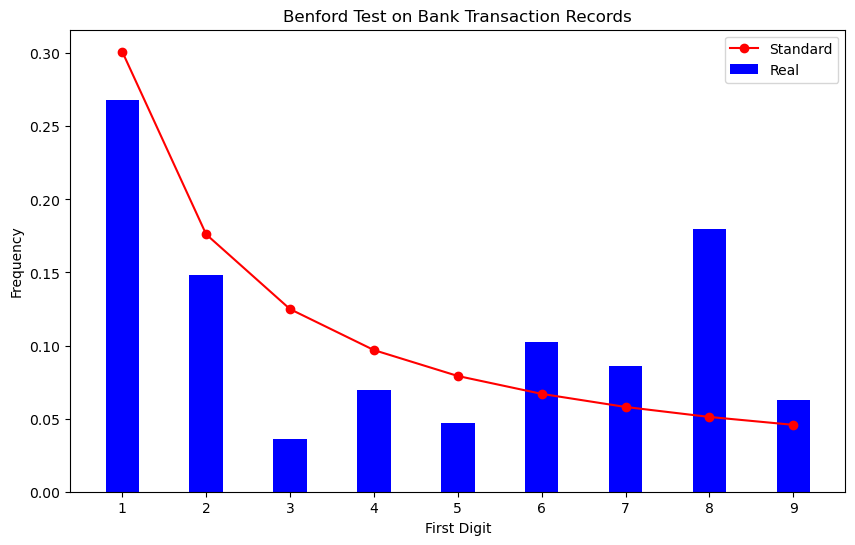

In [ ]:
# 绘图比较
plt.figure(figsize = (10, 6))
plt.bar(range(1, 10), real_freq, width = 0.4, label = 'Real', color = 'b', align = 'center')
plt.plot(range(1, 10), std_freq, marker = 'o', label = 'Standard', color = 'r')
plt.xlabel('First Digit')
plt.ylabel('Frequency')
plt.title('Benford Test on Bank Transaction Records')
plt.xticks(range(1, 10))
plt.legend()
plt.show()